Chapter 17 of [A Guided Tour of Mathematical Methods for the Physical Sciences](https://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition?format=PB&isbn=9781107641600) introduces Green's functions, otherwise known as the Impulse Response. In Chapter 16 we discussed the velocity of a particle in syrup. The equation of motion of a particle with mass $m$ in a syrup with viscosity $\beta$ is $$ m\frac{d v}{d t} +\beta v= f(t).$$
And we found after a Fourier transform and integration in the complex plane that

$$ v(t) = \frac{1}{m}\int_{-\infty}^t e^{-(\beta/m)(t-t')}f(t')dt'.$$

But when we insert an impulsive forcing term $f(t) = \delta(t)$, and appeal to the sifting property of this Dirac delta function, we find that the response to this impulse is

$$ G(t,t') = \frac{1}{m}e^{-(\beta/m)(t-t')}.$$
We use the capital $G$ to name the function that describes the velocity of a particle in syrup due to an in impulsive source.  The "G" reminds us that this impulse response is also called the Green's Function. 

#### Exercise
In Chapter 16, we stumbled onto the Green's function for the velocity of a particle in syrup, but in Chapter 17 you learn ways to compute the Green's function directly:
$$ m\frac{d G}{d t} +\beta G\equiv \delta(t-t').$$

One method is the "jump" method. First, we solve the above equation for $t<t'$ and $t>t'$, where the differential equation is homogeneous:
$$ m\frac{d G}{d t} +\beta G = 0 \ \ \ \ \ \forall \ \ \ \ t \ne t'.$$
Show that the general solutions are of the form
$$ G(t,t') = Ae^{-(\beta/m)(t-t')} \ \ \ t< t'$$ and
$$ G(t,t') = Be^{-(\beta/m)(t-t')} \ \ \ t> t'$$

The unknown coefficients $(A,B)$ of these solutions are found by applying the jump condition.
Because the particle does not move before the impulse moves it, $A=0$ for $t<t'$. This means that the jump condition
$$
    \lim_{\varepsilon \downarrow 0}\left[ G(t,t')\right]
    _{t=t'-\varepsilon }^{t=t'+\varepsilon }=1/m
$$  
means that $B=1/m$.

#### A numerical example
The code below is repeated from the previous Chapter. We approximate a Dirac Delta function with a box of unit area: its width is $a$, and amplitude is $1/a$. Play with the parameters $a,\beta$ and $m$, but be warned: if you choose $a$ too small (inching toward a real Dirac Delta function), the numerical integration may break down... 

<IPython.core.display.Javascript object>


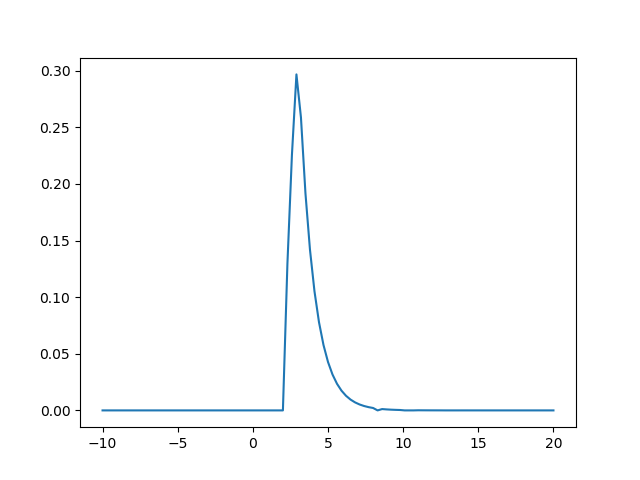

In [4]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# a function to describe the integrand for a constant force function f(t)
def const(tprime,t,m,beta):
    a= 1
    if tprime>=2 and tprime<a+2: # a constant force in a finite interval:
        ftprime = 1/a
    else:
        ftprime = 0
    return ftprime*np.exp(-(beta/m)*(t-tprime))

beta = 2
m = 2

vt = np.array([])
ts = np.linspace(-10,20,101)
for t in ts:
    integral = integrate.quad(const,-10,t, args=(t,m,beta))
    vt = np.append(vt,integral[0])
vt = vt/m

plt.figure()            
plt.plot(ts,vt)
plt.show()

One of the examples of Green's functions in Chapter 18 is the heat equation. In Section 18.1 you can see how the equation -- and Green's function -- for this particle in syrup has the exact same form as the Heat equation in the frequency domain!